In [ ]:
import multiprocessing
import winsound
import time 
import sounddevice as sd
from scipy.io import wavfile
from multiprocessing.dummy import Pool as ThreadPool
import threading
from scipy.signal import chirp,spectrogram
import matplotlib.pyplot as plt
import numpy as np

# t = np.linspace(0,1,5001)
# w = chirp(t, f0=6000, f1=2000, t1=1, method='linear')
# plt.plot(t, w)
# plt.title("Linear Chirp, f(0)=6000, f(1)=2000")
# plt.xlabel('t (sec)')
# plt.show()
# winsound.Beep(4000,1000)
def recording_sound():
    fs =16000 # Hz
    length = 3 # s
    start_win_record_time = time.time()
    print('record:',time.time())
    recording = sd.rec(frames=fs * length, samplerate=fs, blocking=True, channels=1)
    end_win_record_time = time.time()
    wavfile.write('recording.wav', fs, recording)
    return start_win_record_time,end_win_record_time

def sound_wav_out():
    fs = 16000
    t = np.linspace(0,1,fs)
    w = chirp(t, f0=6000, f1=2000, t1=1, method='linear')
    start_sound_play_time =time.time()
    sd.play(w,fs)
    return start_sound_play_time

task1 = threading.Thread(target=recording_sound)
task2 = threading.Thread(target=sound_wav_out)


task1.start()
time.sleep(1)
task2.start()


# task1.join() #This part is usefull only if you want to wait for your tasks to end 
# task2.join()

In [ ]:
import time 
import sounddevice as sd
fs =16000 # Hz
length = 3 # s
start_win_record_time = time.time()

recording = sd.rec(frames=fs * length, samplerate=fs, blocking=False, channels=1)
end_win_record_time = time.time()
print('start record:',start_win_record_time)
print('end_win_record_time:',end_win_record_time)

In [ ]:
import pyaudio
import wave
 
def get_wav(sec):
    #创建对象
    pa = pyaudio.PyAudio()
    #创建流：采样位，声道数，采样频率，缓冲区大小，input
    stream = pa.open(format=pyaudio.paInt16,
                     channels=2,
                     rate=16000,
                     input=True,
                     frames_per_buffer=1024)
    #创建式打开音频文件
    wf = wave.open("test.wav", "wb")
    #设置音频文件的属性：采样位，声道数，采样频率，缓冲区大小，必须与流的属性一致
    wf.setnchannels(2)
    wf.setsampwidth(pa.get_sample_size(pyaudio.paInt16))
    wf.setframerate(16000)
    print("开始录音")
    #采样频率*秒数/缓冲区大小
    print('start record:',time.time())
    for w in range(int(16000*sec/1024)):
        data = stream.read(1024)#每次从流的缓存中读出数据
        wf.writeframes(data)#把读出的数据写入wf
    print('end record:',time.time())
    print("录音结束")
    
    stream.stop_stream()#先把流停止
    stream.close()#再把流关闭
    pa.terminate()#把对象关闭
    wf.close()#把声音文件关闭，否则不能播放
    return "test.wav"
 
file = get_wav(6)

wav_path =  'test.wav'
with wave.open(wav_path, 'rb') as f:
    time_count = f.getparams().nframes/f.getparams().framerate
print(time_count)
 
 

In [ ]:
from scipy.signal import chirp,spectrogram
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0,10,5001)
w = chirp(t, f0=6, f1=1, t1=10, method='linear')
plt.plot(t, w)
plt.title("Linear Chirp, f(0)=6, f(10)=1")
plt.xlabel('t (sec)')
plt.show()

[18770 17990 -6108 ...     0     2     3]


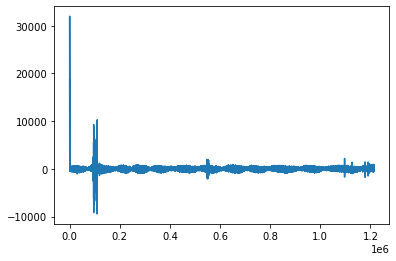

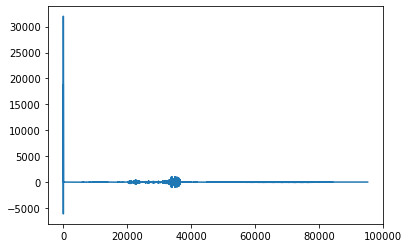

[18770 17990 -6108 ...     0     2     3] [18770 17990  3484 ...   497   517   535]
95245 1214140
[0.002491   0.42526986 1.         ... 0.42513147 0.42526986 0.42533905] [0.67475222 0.49494001 0.92639541 ... 0.51893584 0.51997913 0.5209181 ]
[0.28699847 0.4974691  0.89137362 ... 0.74334223 0.22282604 0.00129761]
73691


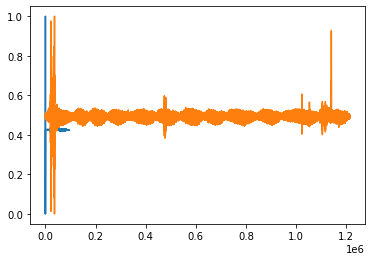

In [19]:
# os.chdir('dataset/0_test')
import numpy as np
from matplotlib import pyplot as plt
import os
# from utils import cross_corr
# os.chdir('dataset/0_test')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


def cross_corr(s1,s2):
    c21 = np.correlate(s2,s1,mode='full')
    print(c21)
    t21 = np.argmax(c21)
    len_s = len(s1)
    index = t21-len_s
    if index > 0 :
        tt1 = s2[index:]
        tt2 = s2[0:index]
        # s2_0 = tt1 + tt2
        s2_0 = np.concatenate((tt1, tt2), axis=0)
    else:
        index = len_s + index
        tt1 = s2[0:index]
        tt2 = s2[index:]
        # s2_0 = tt2 + tt1
        s2_0 = np.concatenate((tt2, tt1), axis=0)
    
    return s1,s2_0,index

wavefile1 = 'win_record.wav'
wavefile2 = 'audio.wav'
def draw(filename1,filename2):
    fig1 = np.memmap(filename1, dtype='h', mode='r')
    fig2 = np.memmap(filename2, dtype='h', mode='r')
    print(fig1)
    plt.figure()
    plt.plot(fig2)
    plt.figure()
    plt.plot(fig1)
    plt.show()
    return fig1,fig2
 
fig1,fig2 = draw(wavefile1,wavefile2)
fig1 = np.array(list(fig1)).flatten()
fig2 = np.array(list(fig2)).flatten()


print(fig1,fig2)
fig_mask1 = np.argwhere((fig1>=-10000)&(fig1<=10000))
fig1 =np.take(fig1,fig_mask1)
fig_mask2 = np.argwhere((fig2>=-10000)&(fig2<=10000))
fig2 =np.take(fig2,fig_mask2)
scaler = MinMaxScaler(feature_range=(0, 1))  #将数据归一到0到1，可以根据数据特点归一到-1到1
fig1 = scaler.fit_transform(fig1)  #归一化
fig2 = scaler.fit_transform(fig2)  #归一化
fig1 = np.array(list(fig1)).flatten()
fig2 = np.array(list(fig2)).flatten()

# fig1 = fig1.tolist()
# fig2 = fig2.tolist()
# fig1 =list(fig1)
# fig2 = list(fig2)
print(len(fig1),len(fig2))
print(fig1,fig2)
fig1_corr,fig2_corr,delay = cross_corr(fig1,fig2)
print(delay)
plt.figure()
plt.plot(fig1_corr)
# plt.figure()
plt.plot(fig2_corr)
plt.show()

In [9]:
print(fig2_corr)

None


In [ ]:
import moviepy.editor as mp
import skvideo.io
videos_file_path = r'C:\Users\T JACK\Desktop\ACSP\code\GreenChannel\audio_test.mp4'
my_clip = mp.VideoFileClip(videos_file_path)

my_clip.audio.write_audiofile(f'{videos_file_path}.mp3')
filepath = r"C:\Users\T JACK\Desktop\ACSP\code\GreenChannel\audio_test.mp4" #---------------TBD
RGB = skvideo.io.vread(filepath)
RGB.shape

In [ ]:
#!/user/bin/env python
# coding=utf-8
"""
@project : batch-pro
@author  : 剑客阿良_ALiang
@file   : audio_tool.py
@ide    : PyCharm
@time   : 2021-12-21 14:48:18
"""
from ffmpy import FFmpeg
 
import os
 
 
# MP3转wav
def audio_transfor(audio_path: str, output_dir: str):
    ext = os.path.basename(audio_path).strip().split('.')[-1]
    if ext != 'mp3':
        raise Exception('format is not mp3')
 
    result = os.path.join(output_dir, '{}.{}'.format(os.path.basename(audio_path).strip().split('.')[0], 'wav'))
    filter_cmd = '-f wav -ac 1 -ar 16000'
    ff = FFmpeg(
        inputs={
            audio_path: None}, outputs={
            result: filter_cmd})
    print(ff.cmd)
    ff.run()
    return result
 
 
def handle(audio_dir: str, output_dir: str):
    for x in os.listdir(audio_dir):
        audio_transfor(os.path.join(audio_dir, x), output_dir)

handle(r'C:\Users\T JACK\Desktop\ACSP\code\GreenChannel\audio_test',r'C:\Users\T JACK\Desktop\ACSP\code\GreenChannel\audio_test1')

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
wavefile = '000.wav'
def draw(filename):
    fig = np.memmap(filename, dtype='h', mode='r')
    print(fig)
    plt.plot(fig)
    plt.show()
    return fig
 
len(draw(wavefile))


In [ ]:
audio_list = draw(wavefile)
audio_list

In [ ]:
audio_list.shape

In [ ]:
sample_num = int(len(audio_list)/RGB.shape[0])
def list_of_groups(init_list, childern_list_len):
    list_of_groups = zip(*(iter(init_list),) *childern_list_len)
    end_list = [list(i) for i in list_of_groups]
    count = len(init_list) % childern_list_len
    end_list.append(init_list[-count:]) if count !=0 else end_list
    return end_list

multi_audio_list = list_of_groups(audio_list,sample_num)

In [ ]:
import sndhdr
import cv2
from flask import before_render_template
import skvideo.io
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
import os
fs = 300
N= 30 * fs
f, pxx = scipy.signal.periodogram(audio_list, fs=fs)
# f, pxx = scipy.signal.periodogram(audio_list, fs=fs, nfft=4 * N, detrend=False)

In [ ]:
from Green_Channel import calculate_HR
fps = 30

for i in range(len(multi_audio_list)):
    f, pxx = scipy.signal.periodogram(multi_audio_list[i], fs=fs, scaling='spectrum')
    HR = np.take(f,argmax(pxx))*60
    print(HR)
    plt.plot(f,pxx)

In [ ]:
import numpy as np
from scipy.fft import *
from scipy.io import wavfile
import wave

def freq(file, start_time, end_time):

    # Open the file and convert to mono
    sr, data = wavfile.read(file)
    if data.ndim > 1:
        data = data[:, 0]
    else:
        pass

    # Return a slice of the data from start_time to end_time
    dataToRead = data[int(start_time * sr / 1000) : int(end_time * sr / 1000) + 1]

    # Fourier Transform
    N = len(dataToRead)
    yf = rfft(dataToRead)
    xf = rfftfreq(N, 1 / sr)

    # Uncomment these to see the frequency spectrum as a plot
    # plt.plot(xf, np.abs(yf))
    # plt.show()

    # Get the most dominant frequency and return it
    idx = np.argmax(np.abs(yf))
    freq = xf[idx]
    return freq

wavefile = r'C:\Users\T JACK\Desktop\ACSP\code\GreenChannel\audio_test1\audio_test.wav'
with wave.open(wavefile,'rb') as f:
        frames = f.getnframes()
        rate = f.getframerate()
        wav_length = frames / float(rate)
        #wav_length = round(frames / float(rate), 1)
        print("音频长度：",wav_length,"秒")

wavetime = int(wav_length)*1000
timestep = 50
start_frame = 0
end_frame = 0
tolerate = 0.01
for i in range(0,wavetime,timestep):
    frequency = freq(wavefile,i,i+timestep)
    print(frequency)
    if(frequency<4000*(1+tolerate) and frequency >4000*(1-tolerate)):
        start_frame = i/timestep
    if(frequency<2000*(1+tolerate) and frequency >2000*(1-tolerate)):
        end_frame = i/timestep
        break
print('start_frame :',start_frame)
print('end_frame :',end_frame)

In [ ]:
filepath = r"C:\Users\T JACK\Desktop\ACSP\code\GreenChannel\audio_test.mp4" #---------------TBD
t1 = (start_frame+10)/20
print(t1)
t2 = (end_frame)/20
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
ffmpeg_extract_subclip(filepath, t1, t2, targetname="PPG_Front.mp4")

In [ ]:
import os
from moviepy.editor import *
# from pydub import AudioSegment
video = VideoFileClip(filepath) # 读取数据
video = video.subclip(t1,t2) # 设置截取数据的范围
video.to_videofile("PPG_Front.mp4") # 保存数据

In [ ]:
from preprocess import generate_pulse_gt
import serial
from flask import Flask
from flask import request, send_file, Flask, flash, request, redirect, url_for, Response
import os
import time
import csv
from werkzeug.utils import secure_filename
import requests
import serial
import winsound




def get_oximeter_data():
    # os.system('start dist/usbserial.exe')
    try:
        portx="COM3"
        #波特率，标准值之一：50,75,110,134,150,200,300,600,1200,1800,2400,4800,9600,19200,38400,57600,115200
        bps=9600
        #超时设置,None：永远等待操作，0为立即返回请求结果，其他值为等待超时时间(单位为秒）
        timex=5
            # 打开串口，并得到串口对象
        ser=serial.Serial(portx,bps,timeout=timex)

        print("串口详情参数：", ser)

        # ser.close()#关闭串口
        csvFile = open('wave.csv', 'w', newline='', encoding='utf-8')

        csv_writer = csv.writer(csvFile)
        
        # csv_writer.writerow([str(int(round(1000 * time.time())))])
        isTwo = False
        strs = ''
        time.sleep(10)
        winsound.Beep(4000,500)
        start_time = int(round(1000 * time.time()))

#60000ms: oximeter time

        while int(round(1000 * time.time())) - start_time < 60000:
            
            if  ser.read().hex() != 'ff' and ser.read().hex() != '00':
                h = ser.read().hex()
                relative_time = str(int(round(1000 * time.time())) - start_time)

            # if h != ' ':
            #     if len(strs) == 0:
            #         strs = strs + h
            #     elif len(strs) == 1:
            #         strs = strs + h 
            #         print([strs])
            #         csv_writer.writerow([strs])
            #     else:
            #         strs = ''
            # print(h)#读一个字节
                print(h)
                csv_writer.writerow([relative_time, h])
        winsound.Beep(2000,500)

        return generate_pulse_gt(h)   

        
    except Exception as e:
        print("---异常---：",e)
        return 'Hello, World!'

get_oximeter_data() 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def cross_corr(s1,s2):
    c21 = np.correlate(s2,s1,mode='full')
    print(c21)
    t21 = np.argmax(c21)
    len_s = len(s1)
    index = t21-len_s
    if index > 0 :
        tt1 = s2[index:]
        tt2 = s2[0:index]
        # s2_0 = tt1 + tt2
        s2_0 = tt1.extend(tt2)
    else:
        index = len_s + index
        tt1 = s2[0:index]
        tt2 = s2[index:]
        # s2_0 = tt2 + tt1
        s2_0 = tt2.extend(tt1)
    
    return s1,s2_0

In [2]:
import pyaudio
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')
for i in range(0, numdevices):
        if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print ("Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))

Input Device id  0  -  Microsoft Sound Mapper - Input
Input Device id  1  -  麦克风 (Yeti Nano)
Input Device id  2  -  麦克风 (Realtek High Definition Au
Input Device id  3  -  立体声混音 (Realtek High Definition 


In [1]:
import serial
import winsound
import sounddevice as sd
import threading
from scipy.signal import chirp,spectrogram
import matplotlib.pyplot as plt
import numpy as np
import pyaudio
import wave 
import time
import os

timestamp_record = [] 
def recording_sound(file_path):
    sec = 4 # s
    #创建对象
    pa = pyaudio.PyAudio()
    # with wave.open(file_path,'w') as wf:
    #创建流：采样位，声道数，采样频率，缓冲区大小，input
    stream = pa.open(format=pyaudio.paInt16,
                    channels=1,
                    rate=16000,
                    input=True,
                    input_device_index= 2,
                    frames_per_buffer=1024)
    #创建式打开音频文件
    wf = wave.open(file_path, "wb")
    #设置音频文件的属性：采样位，声道数，采样频率，缓冲区大小，必须与流的属性一致
    wf.setnchannels(1)
    wf.setsampwidth(pa.get_sample_size(pyaudio.paInt16))
    wf.setframerate(16000)
    print("开始录音")
    #采样频率*秒数/缓冲区大小
    print('start record:',time.time())
    start_win_record_time = time.time()
    for w in range(int(16000*sec/1024)):
        data = stream.read(1024)#每次从流的缓存中读出数据
        wf.writeframes(data)#把读出的数据写入wf
    print('end record:',time.time())
    end_win_record_time = time.time()

    print("录音结束")
    
    stream.stop_stream()#先把流停止
    stream.close()#再把流关闭
    pa.terminate()#把对象关闭
    wf.close()#把声音文件关闭，否则不能播放
    timestamp_record.append(start_win_record_time)
    timestamp_record.append(end_win_record_time)
    return file_path

def start_sound_wav_out():
    fs = 16000
    t = np.linspace(0,3,fs)
    w = chirp(t, f0=2000, f1=200, t1=3, method='linear')
    start_sound_play_time =time.time()
    sd.play(w,fs)
    print('start play :',start_sound_play_time)
    timestamp_record.append(start_sound_play_time)
    return start_sound_play_time

def end_sound_wav_out():
    fs = 16000
    t = np.linspace(0,3,fs)
    w = chirp(t, f0=300, f1=3000, t1=3, method='linear')
    start_sound_play_time =time.time()
    sd.play(w,fs)
    print('end play :',start_sound_play_time)
    timestamp_record.append(start_sound_play_time)
    return start_sound_play_time


if __name__ == "__main__": 
    all_time = []
    for i in range(1) :
        timestamp_record = []
        start_file = str(i)+'start.wav'
        end_file = str(i)+'end.wav'
        task1 = threading.Thread(target=recording_sound,args=(start_file,))
        task2 = threading.Thread(target=start_sound_wav_out)
        task3 = threading.Thread(target=recording_sound,args=(end_file,))
        task4 = threading.Thread(target=end_sound_wav_out)

        # os.system('pause')
        task1.start()
        time.sleep(0.5)
        task2.start()
        time.sleep(10)

        task3.start()
        time.sleep(0.5)
        task4.start()
        time.sleep(2)
        all_time.append(timestamp_record[4]-timestamp_record[1])

开始录音
start record: 1662341628.8742385
start play : 1662341629.238953
end record: 1662341632.8433628
录音结束


KeyboardInterrupt: 

In [5]:
import subprocess 
from sklearn.preprocessing import MinMaxScaler
import scipy
import serial
import winsound
import sounddevice as sd
import threading
from scipy.signal import chirp,spectrogram
import matplotlib.pyplot as plt
import numpy as np
import pyaudio
import wave 
import time
import os

def cross_corr(s1,s2):
    c21 = scipy.signal.correlate(s2,s1,mode='full',method = 'auto')
    # c21 = np.correlate(s2,s1,mode='full')
    # print(c21)
    t21 = np.argmax(c21)
    len_s = len(s1)
    index = t21-len_s
    delay = index
# 若index>0，则说明s1信号领先s2信号index个距离
# 若index<0，则说明s2信号领先s1信号index个距离
    if index > 0 :
        tt1 = s2[index:]
        tt2 = s2[0:index]
        s2_0 = np.concatenate((tt1, tt2), axis=0)
    else:
        index = len_s + index
        tt1 = s2[0:index]
        tt2 = s2[index:]

        s2_0 = np.concatenate((tt2, tt1), axis=0)
    
    return s1,s2_0,delay

def audio_sync(win_sound_file,video_sound_file):
    fs = 16000
    fig1 = np.memmap(win_sound_file, dtype='h', mode='r')
    fig2 = np.memmap(video_sound_file, dtype='h', mode='r')
    
    fig1 = np.array(list(fig1)).flatten()
    fig2 = np.array(list(fig2)).flatten()
    # print(fig1,fig2)
    fig_mask1 = np.argwhere((fig1>=-40000)&(fig1<=40000))
    fig1 =np.take(fig1,fig_mask1)
    fig_mask2 = np.argwhere((fig2>=-40000)&(fig2<=40000))
    fig2 =np.take(fig2,fig_mask2)
    scaler = MinMaxScaler(feature_range=(0, 1))  #将数据归一到0到1，可以根据数据特点归一到-1到1
    fig1 = scaler.fit_transform(fig1)  #归一化
    fig2 = scaler.fit_transform(fig2)  #归一化
    fig1 = np.array(list(fig1)).flatten()
    fig2 = np.array(list(fig2)).flatten()
    fig1[0:5]=0
    fig2[0:5]=0
    [b_pulse, a_pulse] = scipy.signal.butter(1, [200 / fs * 2, 3000/ fs * 2], btype='bandpass')
    fig1 = scipy.signal.filtfilt(b_pulse, a_pulse, np.double(fig1))
    fig2 = scipy.signal.filtfilt(b_pulse, a_pulse, np.double(fig2))
    fig1_corr,fig2_corr,delay = cross_corr(fig1,fig2)

    delay_time = delay/16000
    return delay_time
    
def extract_audio(video,output):
    if os.path.exists(output) is False:
        command = "ffmpeg -n -i "+str(video) +" -ar 16000 -ac 1 -f wav "+str(output)
        print(command)
        subprocess.call(command,shell=True)
    else:
        return 'already exist'

def file_filter(f):
    if f[-4:] in ['.mp4']:
        return True
    else:
        return False
        
if __name__ == "__main__": 
    
    origin_path =  r'C:\Users\T JACK\Desktop\ACSP\code\GreenChannel\audio_test' #数据集根目录
    current_path = origin_path
    os.chdir(current_path)
    all_time = np.load('all_time.npy')
    print(all_time[0])
    filelist = os.listdir(current_path)   # 文件夹路径
    filelist = list(filter(file_filter, filelist))
    filetype = '.mp4'             # 文件类型
    filelist.sort(key=lambda x: int(x[-9: -4])) 
    file_order = 0
    print("filelist:",filelist)
    for file in filelist:
        
        Olddir = os.path.join(current_path, file)
        if os.path.isdir(Olddir):
            continue
        filename = os.path.splitext(file)[0]
        # print("filename1:",filename)
        filetype = os.path.splitext(file)[1]
        filename = str(filename)
        Newdir = os.path.join(current_path,  str(file_order)+ filetype) # zfill(6) # 填充到6位字符串
        # print("filename2:",Newdir)
        os.rename(Olddir, Newdir)
        file_order+=1

    for i in range(10) :
        print(all_time[i])
        filepath = str(i)+'.mp4'
        wav_file = str(i)+'.wav'
        wavefile1 = str(i)+'start.wav'
        wavefile2 = str(i)+'end.wav'
        extract_audio(filepath,wav_file)
        delay_time_1 = audio_sync(wavefile1,wav_file)
        delay_time_2 = audio_sync(wavefile2,wav_file)
        # print(delay_time_1,delay_time_2)
        relative_delay_time = 1000*(delay_time_2-delay_time_1-all_time[i])
        if abs(relative_delay_time) >10:
            print("同步异常 : ", relative_delay_time)
        else:
            print("同步正常 : ", relative_delay_time)

6.400145053863525
filelist: ['0.mp4', '1.mp4', '2.mp4', '3.mp4', '4.mp4', '5.mp4', '6.mp4', '7.mp4', '8.mp4', '9.mp4']
6.400145053863525
同步正常 :  1.979946136474453
6.39190411567688
同步正常 :  -0.3416156768798473
6.4027111530303955
同步正常 :  0.7888469696055722
6.398177623748779
同步正常 :  -1.615123748779368
6.402601003646851
同步正常 :  -3.2260036468505504
6.381778717041016
同步正常 :  1.908782958983224
6.39106559753418
同步正常 :  0.8719024658212504
6.431218147277832
同步正常 :  0.03185272216832402
6.39517068862915
同步正常 :  0.20431137085008544
6.401900291442871
同步正常 :  2.4122085571285368


In [14]:
delay_time_2-delay_time_1

10.5285625

In [15]:
timestamp_record[4]-timestamp_record[1]

10.521978855133057